# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# uploading file for flatiron lesson
# source: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()

Saving ames.csv to ames.csv


In [6]:
df = pd.read_csv('ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [7]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [8]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [9]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

In [12]:
import seaborn as sns

In [14]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<Figure size 640x480 with 0 Axes>

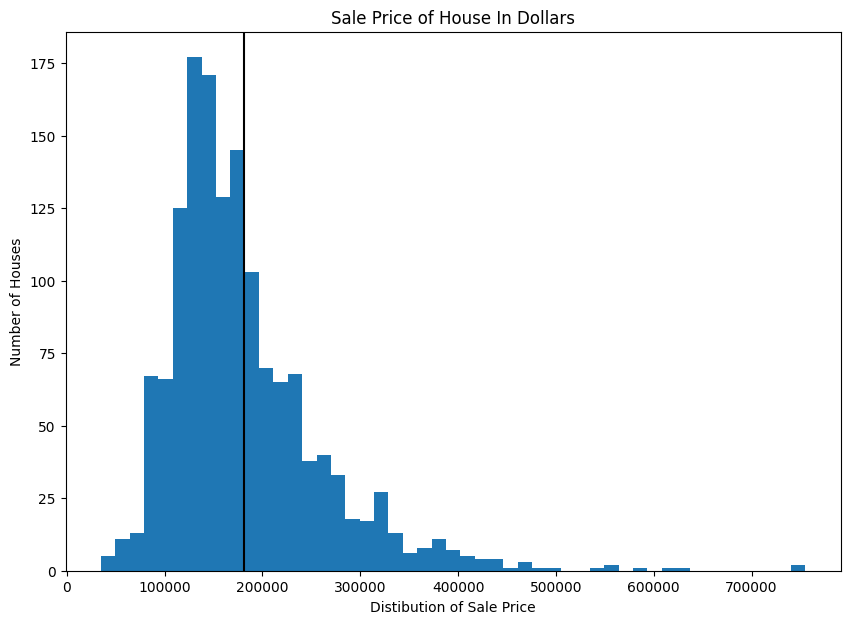

In [18]:
# Student version
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10, 7))

data = df['SalePrice']
mean = data.mean()
ax.hist(data, bins="auto")
ax.axvline(mean, color = 'black')
ax.set_xlabel("Distibution of Sale Price")
ax.set_ylabel("Number of Houses")
ax.set_title("Sale Price of House In Dollars");

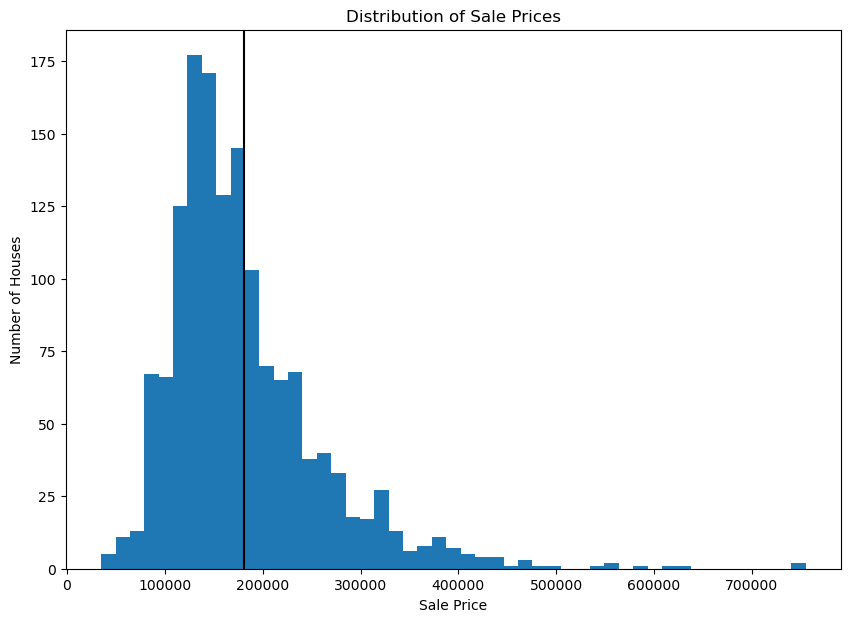

In [ ]:
# GitHub solution

# This solution uses a function to avoid repeated code, but a 
# function is not 100% necessary. You could replace each of the
# parameters with a hard-coded value instead.

def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plot_histogram(
    df,
    "SalePrice",
    "Distribution of Sale Prices",
    "Sale Price",
    "Number of Houses")

Now, print out the mean, median, and standard deviation:

In [24]:
# Morgan Solution
# defining variables
data = df['SalePrice']
mean = data.mean()
median = data.median()
standard_deviation = data.std()

# printing with f strings
print(f'The mean sale price is ${mean}.')
print(f'The median sale price is ${median}.')
print(f'The dispersion of the sale price relative to its mean (a.k.a. standard deviation) is ${standard_deviation}.')


The mean sale price is $180921.19589041095.
The median sale price is $163000.0.
The dispersion of the sale price relative to its mean (a.k.a. standard deviation) is $79442.50288288662.


In [ ]:
# GitHub solution
def print_stats(df, column):
    print("Mean:", df[column].mean())
    print("Median: ", df[column].median())
    print("Standard Deviation:", df[column].std())
print_stats(df, "SalePrice")

Mean: 180921.19589041095
Median:  163000.0
Standard Deviation: 79442.50288288662


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
These numbers indicate that there are a significant number of houses selling for around $163k. 
The pricier outliers are pulling the mean up to $180k.
"""

In [ ]:
# Justin and I wrote this and it got buried under all my cells!

# Replace None with appropriate text
"""
With some outliers from one extreme from the other and a large standard deviation, 
it would seem median is the most hepful type of central tendency to look at if 
you wanted to know the cost of housing across this data set.
"""

In [25]:
data = df['SalePrice']
data.mode()

0    140000
Name: SalePrice, dtype: int64

In [26]:
# refreshing my memory as to the length
len(df)

1460

In [29]:
# After looking at the mode, I wanted to know what the frequency of 
# the price values was across the dataset
price_freq = df['SalePrice'].value_counts()
price_freq

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

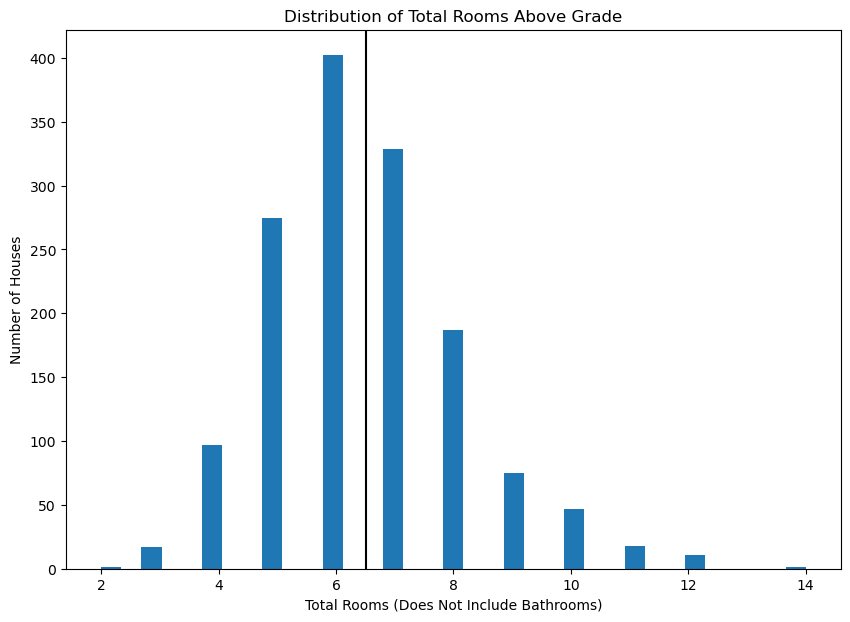

In [ ]:
plot_histogram(
   
    df,
    "TotRmsAbvGrd",
    "Distribution of Total Rooms Above Grade",
    "Total Rooms (Does Not Include Bathrooms)",
    "Number of Houses"
)

Now, print out the mean, median, and standard deviation:

In [ ]:
print_stats(df, "TotRmsAbvGrd")

Mean: 6.517808219178082
Median:  6.0
Standard Deviation: 1.6253932905840505


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text

"""
Looking at the histogram, most houses have between 4 and 8 rooms. 
The average and median are close together. 
The standard deviation is only 1.62. So you could use either the median 
or the mean despite the outliers, but perhaps a range of 4 - 8 would be best.

"""

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

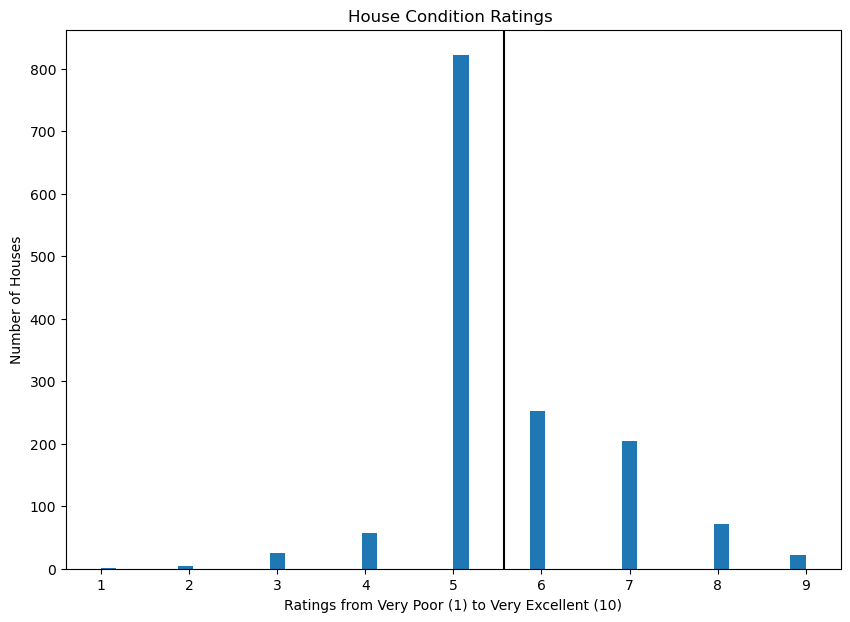

In [ ]:

plot_histogram(
   
    df,
    "OverallCond",
    "House Condition Ratings ",
    "Ratings from Very Poor (1) to Very Excellent (10)",
    "Number of Houses"
)

Now, print out the mean, median, and standard deviation:

In [ ]:
print_stats(df, "OverallCond")

Mean: 5.575342465753424
Median:  5.0
Standard Deviation: 1.1127993367127316


In the cell below, interpret the above information.

In [ ]:
"""
Once again we see that the mean and the median are very close together 
and the standard deviation is a low number as well. With the vast majority 
of houses falling under a 5 rating (same as median and mean), 
employing mode here would be useful as well.
"""

In [30]:
# sanity check using mode
data = df['OverallCond']
data.mode()

0    5
Name: OverallCond, dtype: int64

In [31]:
# Looking the frequency of the ratings values 

ratings_freq = df['OverallCond'].value_counts()
ratings_freq

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [32]:
# Replace None with appropriate code
below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]
above_average_condition = df[df["OverallCond"] > 5]

In [47]:
# I wanted to create a new column with the condition rating.
def categorize_condition(value):
    if value < 5:
        return 'below_average_condition'
    elif value == 5:
        return 'average_condition'
    else:
        return 'above_average_condition'
    
def get_condition_category(df):
    df['ConditionCategory'] = df['OverallCond'].apply(categorize_condition)
    return df

In [48]:

get_condition_category(df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ConditionCategory
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,average_condition
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,above_average_condition
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,average_condition
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,average_condition
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,average_condition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,average_condition
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,above_average_condition
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,above_average_condition


In [55]:
# sanity check
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [56]:
# I am concerned that my changes will get in the way of the next questions in the lab
# so I am using the .pop() method to remove the column I created.
df.pop('ConditionCategory')


Id
1             average_condition
2       above_average_condition
3             average_condition
4             average_condition
5             average_condition
                 ...           
1456          average_condition
1457    above_average_condition
1458    above_average_condition
1459    above_average_condition
1460    above_average_condition
Name: ConditionCategory, Length: 1460, dtype: object

In [57]:
# sanity check to make sure column is gone
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

The following code checks that you created the subsets correctly:

In [35]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

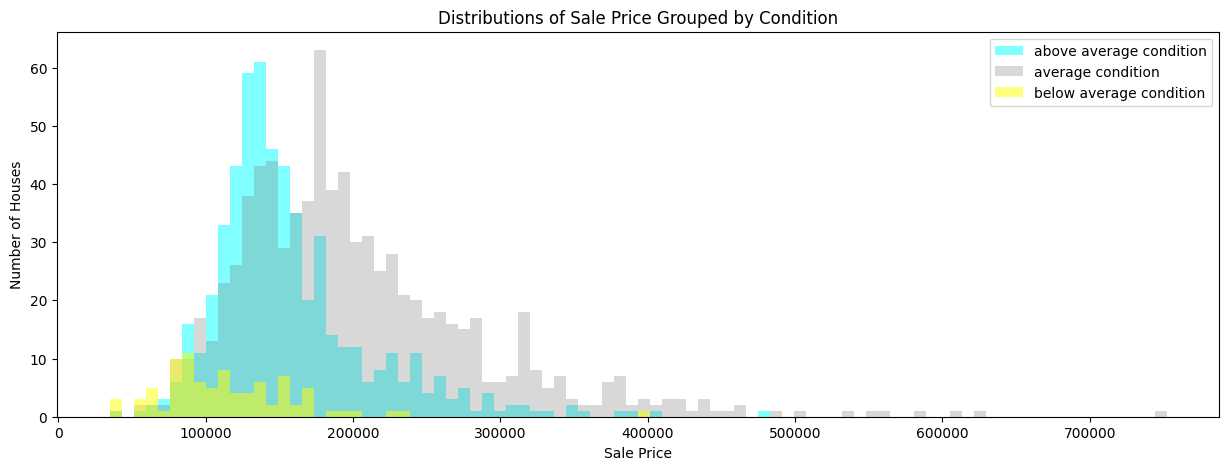

In [36]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text

"""
 It is surprising to see that there are houses of below average condition
  that are selling for higher prices than some of the above average houses. 
  However, there could be houses in need of repair that are appealing to 
  buyers for a number of reasons: "good bones" or structural integrity,
   prime location, more acreage, more rooms, square feet, etc.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ConditionCategory
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,average_condition
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,above_average_condition
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,average_condition
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,average_condition
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,average_condition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,average_condition
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,above_average_condition
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,above_average_condition


In [58]:
# filter the data frame so that it only contains numerical values
# reminder to self: using 'int64' and 'float64' instead of 
# 'int' and 'float' since pandas usually uses these 
#data types for integer and floating-point columns.

df_numeric = df.select_dtypes(include=['int64','float64'])
#compute the correlation matrix
correlation_matrix = df_numeric.corr()



In [59]:
correlation_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [65]:
# I wanted to see the strongest correlations regardlest of positive or negative
# Reminder to self: ignoring the first, as it's the correlation with itself

strongest_correlated = {column: correlation_matrix[column].abs().sort_values(ascending=False).index[1] 
                              for column in correlation_matrix}

strongest_correlated 



{'MSSubClass': 'LotFrontage',
 'LotFrontage': '1stFlrSF',
 'LotArea': 'LotFrontage',
 'OverallQual': 'SalePrice',
 'OverallCond': 'YearBuilt',
 'YearBuilt': 'GarageYrBlt',
 'YearRemodAdd': 'GarageYrBlt',
 'MasVnrArea': 'SalePrice',
 'BsmtFinSF1': 'BsmtFullBath',
 'BsmtFinSF2': 'BsmtUnfSF',
 'BsmtUnfSF': 'BsmtFinSF1',
 'TotalBsmtSF': '1stFlrSF',
 '1stFlrSF': 'TotalBsmtSF',
 '2ndFlrSF': 'GrLivArea',
 'LowQualFinSF': 'YearBuilt',
 'GrLivArea': 'TotRmsAbvGrd',
 'BsmtFullBath': 'BsmtFinSF1',
 'BsmtHalfBath': 'BsmtFullBath',
 'FullBath': 'GrLivArea',
 'HalfBath': '2ndFlrSF',
 'BedroomAbvGr': 'TotRmsAbvGrd',
 'KitchenAbvGr': 'MSSubClass',
 'TotRmsAbvGrd': 'GrLivArea',
 'Fireplaces': 'SalePrice',
 'GarageYrBlt': 'YearBuilt',
 'GarageCars': 'GarageArea',
 'GarageArea': 'GarageCars',
 'WoodDeckSF': 'SalePrice',
 'OpenPorchSF': 'GrLivArea',
 'EnclosedPorch': 'YearBuilt',
 '3SsnPorch': 'LotFrontage',
 'ScreenPorch': 'Fireplaces',
 'PoolArea': 'LotFrontage',
 'MiscVal': 'OverallCond',
 'MoSold': 'Y

In [62]:

# Dictionary comprehension to get most positively correlated column for each column

# Note: ignoring the first value as it's the correlation with itself

most_positively_correlated = {column: correlation_matrix[column].sort_values(ascending=False).index[1] 
                              for column in correlation_matrix}


most_positively_correlated

{'MSSubClass': '2ndFlrSF',
 'LotFrontage': '1stFlrSF',
 'LotArea': 'LotFrontage',
 'OverallQual': 'SalePrice',
 'OverallCond': 'BsmtHalfBath',
 'YearBuilt': 'GarageYrBlt',
 'YearRemodAdd': 'GarageYrBlt',
 'MasVnrArea': 'SalePrice',
 'BsmtFinSF1': 'BsmtFullBath',
 'BsmtFinSF2': 'BsmtFullBath',
 'BsmtUnfSF': 'TotalBsmtSF',
 'TotalBsmtSF': '1stFlrSF',
 '1stFlrSF': 'TotalBsmtSF',
 '2ndFlrSF': 'GrLivArea',
 'LowQualFinSF': 'GrLivArea',
 'GrLivArea': 'TotRmsAbvGrd',
 'BsmtFullBath': 'BsmtFinSF1',
 'BsmtHalfBath': 'OverallCond',
 'FullBath': 'GrLivArea',
 'HalfBath': '2ndFlrSF',
 'BedroomAbvGr': 'TotRmsAbvGrd',
 'KitchenAbvGr': 'MSSubClass',
 'TotRmsAbvGrd': 'GrLivArea',
 'Fireplaces': 'SalePrice',
 'GarageYrBlt': 'YearBuilt',
 'GarageCars': 'GarageArea',
 'GarageArea': 'GarageCars',
 'WoodDeckSF': 'SalePrice',
 'OpenPorchSF': 'GrLivArea',
 'EnclosedPorch': 'OverallCond',
 '3SsnPorch': 'LotFrontage',
 'ScreenPorch': 'Fireplaces',
 'PoolArea': 'LotFrontage',
 'MiscVal': 'OverallCond',
 'MoSold

In [69]:
type(most_positively_correlated)

dict

In [70]:
most_positively_correlated.keys()

dict_keys(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])

In [ ]:
print(d['key1'])

In [72]:
# printing the column most positively correlated with sale price
price_raiser = most_positively_correlated['SalePrice']

print(f'The column most positively correlated with sale price is {price_raiser}.')

The column most positively correlated with sale price is OverallQual.


Now, find the ***most negatively correlated*** column:

In [64]:
# Dictionary comprehension to get most negatively correlated column for each column
most_negatively_correlated = {column: correlation_matrix[column].sort_values().index[0] 
                              for column in correlation_matrix}
most_negatively_correlated 

{'MSSubClass': 'LotFrontage',
 'LotFrontage': 'MSSubClass',
 'LotArea': 'MSSubClass',
 'OverallQual': 'KitchenAbvGr',
 'OverallCond': 'YearBuilt',
 'YearBuilt': 'EnclosedPorch',
 'YearRemodAdd': 'EnclosedPorch',
 'MasVnrArea': 'OverallCond',
 'BsmtFinSF1': 'BsmtUnfSF',
 'BsmtFinSF2': 'BsmtUnfSF',
 'BsmtUnfSF': 'BsmtFinSF1',
 'TotalBsmtSF': 'MSSubClass',
 '1stFlrSF': 'MSSubClass',
 '2ndFlrSF': '1stFlrSF',
 'LowQualFinSF': 'YearBuilt',
 'GrLivArea': 'OverallCond',
 'BsmtFullBath': 'BsmtUnfSF',
 'BsmtHalfBath': 'BsmtFullBath',
 'FullBath': 'OverallCond',
 'HalfBath': '1stFlrSF',
 'BedroomAbvGr': 'BsmtFullBath',
 'KitchenAbvGr': 'OverallQual',
 'TotRmsAbvGrd': 'OverallCond',
 'Fireplaces': 'KitchenAbvGr',
 'GarageYrBlt': 'OverallCond',
 'GarageCars': 'OverallCond',
 'GarageArea': 'OverallCond',
 'WoodDeckSF': 'EnclosedPorch',
 'OpenPorchSF': 'EnclosedPorch',
 'EnclosedPorch': 'YearBuilt',
 '3SsnPorch': 'MSSubClass',
 'ScreenPorch': 'EnclosedPorch',
 'PoolArea': 'YrSold',
 'MiscVal': 'Garag

In [73]:
# printing the column most negatively correlated with sale price
price_neg = most_negatively_correlated['SalePrice']

print(f'The column most negatively correlated with sale price is {price_neg}.')

The column most negatively correlated with sale price is KitchenAbvGr.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

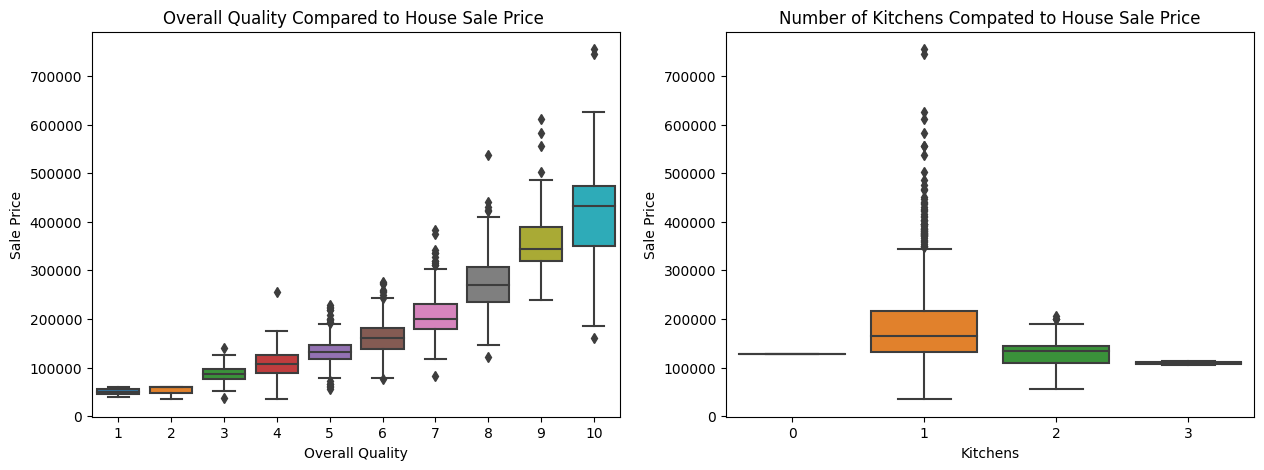

In [74]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Overall Quality Compared to House Sale Price ')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Number of Kitchens Compated to House Sale Price')
ax2.set_xlabel('Kitchens')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
Although correlation is not causation, it would seem 
(and it stands to reason that this would be the case) 
that overall house quality has the strongest impact 
on the selling price of houses in this dataset.
Quality is distinct from condition (as touched on in a previous answer). 
For example, you can have a house that has been freshly renovated with a
poor construction. So despite the fact that it may be move-in ready, it 
might not be the best investment long term when compared to a house of
higher quality.

The number of kitchens above ground is a more complex variable to consider given
that it might be desirable for a landlord or someone else looking for a multi-family unit.
Perhaps there is less of a market for that type of housing in the area? Or perhaps the houses with more
kitchens above ground have experienced more wear and tear due to being home to more residents? 
Looking at the most_negatively_correlated dictionary, we can see that overall quality is 
negatively correlated with kitchens above ground. So my hunch may be correct. This is worth further investigation.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [75]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

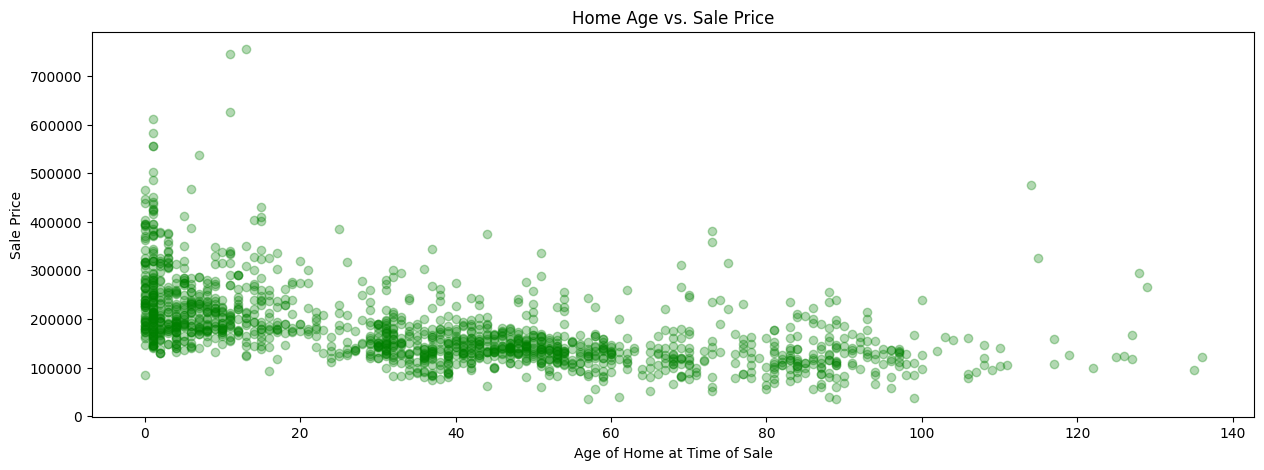

In [76]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
Generally speaking, newer houses appear to capture higher sale prices.
There are some outliers that could be indicative of older houses having
more desirable traits at the time of sale, some of which I have already mentioned. 
Looking at the data description, there are variables like remodeling and roof type 
that can significantly impact value. We have only taken a brief look at the data so far. It would
take a closer look and more equations to get a full picture of all the things
that drive a sale price up or down. 
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.